In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import splitfolders

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import os
import cv2

import numpy as np
import os
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
labels = ['plain', 'pothole','crack']
img_size = 256
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [3]:
data = get_data('TestFolder')

/var/folders/7c/s_44qy7x2xl31y_8nm69xyg80000gn/T/ipykernel_81771/1970823238.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


/Applications/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

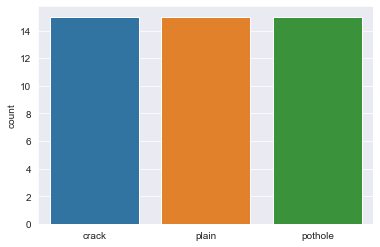

In [5]:
l = []
for i in data:
    if(i[1] == 0):
        l.append("crack")
    elif(i[1] == 1):
        l.append("plain")
    elif(i[1] == 2):
        l.append("pothole")
sns.set_style('darkgrid')
sns.countplot(l)

In [10]:
splitfolders.ratio("TestFolder", output="output",
    seed=1337, ratio=(.8, .2), group_prefix=None, move=False) # default values

Copying files: 45 files [00:00, 1231.73 files/s]


In [11]:
train = get_data('output/train')
val = get_data('output/val')

/var/folders/7c/s_44qy7x2xl31y_8nm69xyg80000gn/T/ipykernel_81771/1970823238.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


In [13]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

In [14]:
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [16]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [ ]:
model = Sequential()


# First Convolution Layer
model.add(Conv2D(32,kernel_size=(5,5),padding="same", activation="relu", input_shape=(256,256,3)))

# First Pooling Layer
model.add(MaxPool2D())

# Second Convolution Layer
model.add(Conv2D(64, 3, padding="same", activation="relu"))


# Second Pooling Layer
model.add(MaxPool2D())

# Flattening Layer
model.add(Flatten())

# First Fully Connected Layer
model.add(Dense(13,activation="relu"))

# Second Fully Connected Layer
model.add(Dense(3, activation="softmax"))
model.add(Dropout(0.4))


opt = Adam(lr=0.0001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])


model.summary()
# Compile the model
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________


In [19]:
history = model.fit(x_train,y_train,epochs = 20 , validation_data = (x_val, y_val))

Epoch 1/20
2/2 [==============================] - 1s 255ms/step - loss: 1.6574 - accuracy: 0.4167 - val_loss: 1.6618 - val_accuracy: 0.3333
Epoch 2/20
2/2 [==============================] - 1s 230ms/step - loss: 1.6702 - accuracy: 0.3611 - val_loss: 1.6552 - val_accuracy: 0.3333
Epoch 3/20
2/2 [==============================] - 1s 230ms/step - loss: 1.7253 - accuracy: 0.2778 - val_loss: 1.6461 - val_accuracy: 0.3333
Epoch 4/20
2/2 [==============================] - 1s 226ms/step - loss: 1.7514 - accuracy: 0.2778 - val_loss: 1.6852 - val_accuracy: 0.3333
Epoch 5/20
2/2 [==============================] - 1s 229ms/step - loss: 1.7239 - accuracy: 0.3333 - val_loss: 1.6936 - val_accuracy: 0.3333
Epoch 6/20
2/2 [==============================] - 1s 227ms/step - loss: 1.6957 - accuracy: 0.3889 - val_loss: 1.6904 - val_accuracy: 0.3333
Epoch 7/20
2/2 [==============================] - 1s 233ms/step - loss: 1.8288 - accuracy: 0.1944 - val_loss: 1.6807 - val_accuracy: 0.3333
Epoch 8/20
2/2 [====

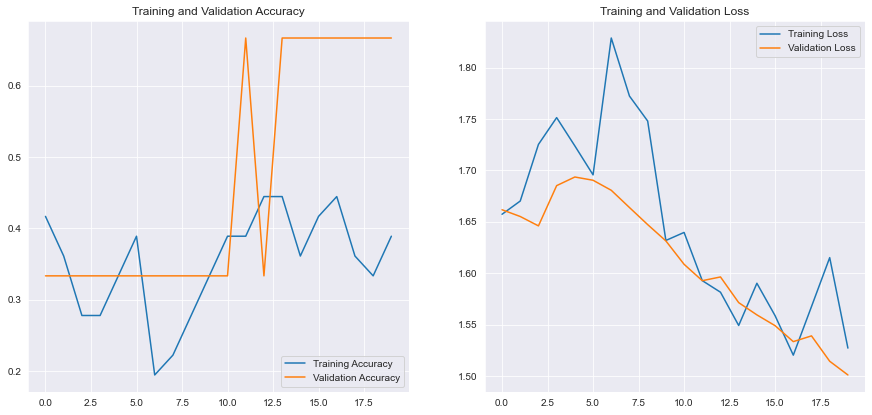

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()